In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['pdf.fonttype'] = 42

In [3]:
wt = pd.read_csv('longer-intervals/wt-to-final.csv')
wt_ext = wt.iloc[:,0:3]
wt_ext['ratio'] = wt[' AverageBrightness(Seg)_C1'].values/wt[' AverageBrightness(Seg)_C0'].values

dCCP = pd.read_csv('longer-intervals/dCCP-to-final.csv')
dCCP_ext = dCCP.iloc[:,0:3]
dCCP_ext['ratio'] = dCCP[' AverageBrightness(Seg)_C1'].values/dCCP[' AverageBrightness(Seg)_C0'].values
wt_ext

CellID   LinkID   ImgNo     ratio
0         1      NaN     116  1.872771
1         1      NaN     117  1.933092
2         1      NaN     118  1.995469
3         1      NaN     119  1.872432
4         1      NaN     120  1.482272
..      ...      ...     ...       ...
831      10      NaN     212  1.639342
832      10      NaN     213  1.564906
833      10      NaN     214  1.617815
834      10      NaN     215  1.540985
835      10      NaN     216  1.538489

[836 rows x 4 columns]

In [4]:
wt_pivot = wt_ext.pivot(index= ' ImgNo', columns="CellID", values="ratio")
for i in range(10):
    tmp = wt_pivot[i+1].dropna().values
    tmp = np.hstack([tmp, np.full(len(wt_pivot.index)-tmp.shape[0],np.nan)])
    wt_pivot[i+1] = tmp
wt_pivot['time'] = np.arange(-25,480,5)

dCCP_pivot = dCCP_ext.pivot(index= ' ImgNo', columns="CellID", values="ratio")
for i in range(10):
    tmp = dCCP_pivot[i+1].dropna().values
    tmp = np.hstack([tmp, np.full(len(dCCP_pivot.index)-tmp.shape[0],np.nan)])
    dCCP_pivot[i+1] = tmp
dCCP_pivot['time'] = np.arange(-25,490,5)

#wt_pivot = wt_pivot.dropna(how='any')
#dCCP_pivot = dCCP_pivot.dropna(how='any')

wt_pivot

CellID         1         2         3         4         5         6         7  \
 ImgNo                                                                         
116     1.872771  1.954170  1.874900  1.848327  1.894572  1.806159  1.835296   
117     1.933092  2.024602  1.924838  1.901262  1.931524  1.914625  1.946601   
118     1.995469  2.018365  1.966441  1.989108  1.961011  1.964468  2.011022   
119     1.872432  1.857261  1.954264  1.993984  1.938594  1.982870  1.996565   
120     1.482272  1.550183  1.672890  1.746603  1.526437  1.608797  1.651407   
...          ...       ...       ...       ...       ...       ...       ...   
212     1.596226  1.516861       NaN       NaN       NaN       NaN       NaN   
213     1.588216  1.514758       NaN       NaN       NaN       NaN       NaN   
214     1.648450       NaN       NaN       NaN       NaN       NaN       NaN   
215     1.597694       NaN       NaN       NaN       NaN       NaN       NaN   
216     1.620751       NaN       NaN       NaN       NaN       NaN       NaN   

CellID         8         9        10  time  
 ImgNo                                      
116     1.907714  1.861073  1.835053   -25  
117     1.950943  1.883941  1.928663   -20  
118     1.932263  1.924933  1.957480   -15  
119     1.861197  1.867865  1.941939   -10  
120     1.534771  1.500444  1.610446    -5  
...          ...       ...       ...   ...  
212          NaN       NaN       NaN   455  
213          NaN       NaN       NaN   460  
214          NaN       NaN       NaN   465  
215          NaN       NaN       NaN   470  
216          NaN       NaN       NaN   475  

[101 rows x 11 columns]

In [5]:
wt_melt = wt_pivot.iloc[:55,:].melt( id_vars= "time")
dCCP_melt = dCCP_pivot.iloc[:55,:].melt( id_vars= "time")

wt_melt

time CellID     value
0     -25      1  1.872771
1     -20      1  1.933092
2     -15      1  1.995469
3     -10      1  1.872432
4      -5      1  1.482272
..    ...    ...       ...
545   225     10  1.603722
546   230     10  1.597771
547   235     10  1.639342
548   240     10  1.564906
549   245     10  1.617815

[550 rows x 3 columns]

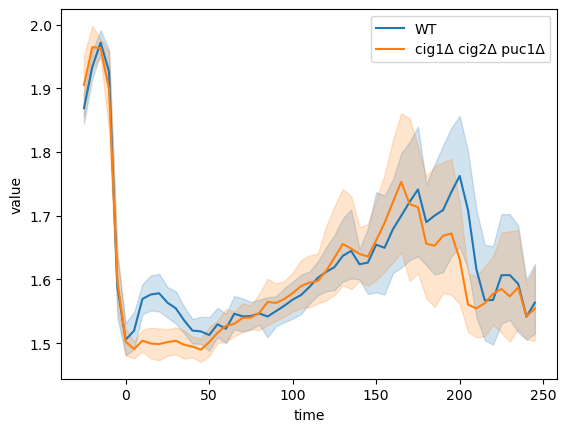

In [6]:
sns.lineplot(data=wt_melt, x='time',y='value', label='WT')
sns.lineplot(data=dCCP_melt, x='time',y='value', label='cig1Δ cig2Δ puc1Δ')
plt.savefig('dCCP-5min-interval.pdf')
plt.legend(loc='upper right')
plt.show()

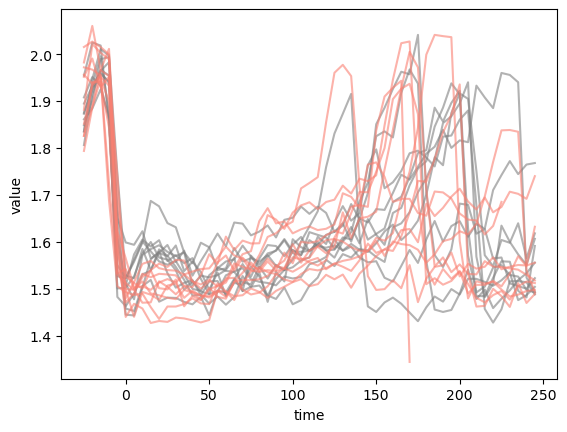

In [7]:
sns.lineplot(data=wt_melt, x='time',y='value', legend=False, estimator=None, units="CellID", color='gray',alpha=0.6)
sns.lineplot(data=dCCP_melt, x='time',y='value', legend=False, estimator=None, units="CellID",color='salmon',alpha=0.6)
plt.show()

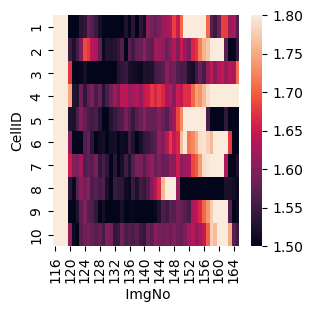

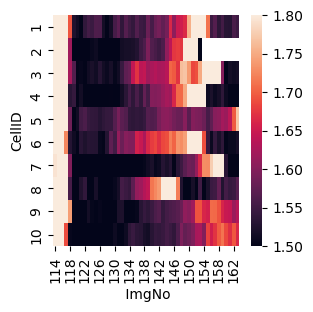

(10, 50)

(10, 50)

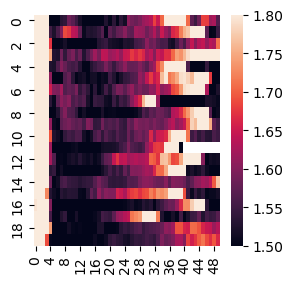

In [8]:
plt.figure(figsize=(3,3))
sns.heatmap(wt_pivot.iloc[0:50,:-1].T, vmax=1.8, vmin=1.5)
plt.savefig('WT-5min-interval-heatmap.pdf')
plt.show()
plt.figure(figsize=(3,3))
sns.heatmap(dCCP_pivot.iloc[0:50,:-1].T, vmax=1.8, vmin=1.5)
plt.savefig('dCCP-5min-interval-heatmap.pdf')
plt.show()


display(wt_pivot.iloc[:50,:-1].T.values.shape)
display(dCCP_pivot.iloc[:50,:-1].T.values.shape)

plt.figure(figsize=(3,3))
sns.heatmap(np.hstack([wt_pivot.iloc[:50,:-1].values, dCCP_pivot.iloc[:50,:-1].values]).T, vmax=1.8, vmin=1.5)
plt.show()


ShapiroResult(statistic=0.946229100227356, pvalue=0.6241521239280701)
ShapiroResult(statistic=0.9340701699256897, pvalue=0.48909783363342285)
0.03144740890716272
0.028160851125116626


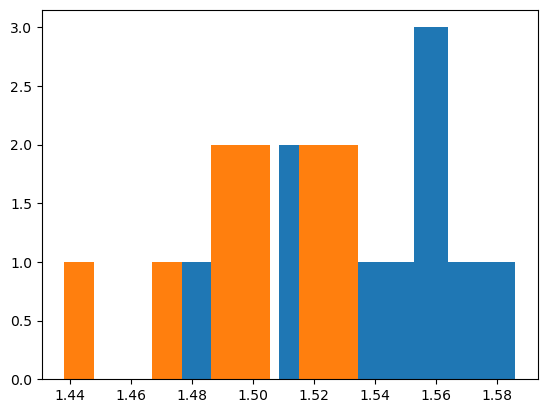

MannwhitneyuResult(statistic=83.0, pvalue=0.014019277113959953)

In [74]:
wt_S = wt_pivot.iloc[5:16,:-1].mean().values
dCCP_S = dCCP_pivot.iloc[5:16,:-1].mean().values

print(stats.shapiro(wt_S))
print(stats.shapiro(dCCP_S))

print(np.std(wt_S))
print(np.std(dCCP_S))

plt.hist(wt_S, bins=10)
plt.hist(dCCP_S, bins=10)
plt.show()

stats.mannwhitneyu(wt_S, dCCP_S, alternative='two-sided')

In [76]:
stats.ttest_ind(wt_S, dCCP_S, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=3.038448593227622, pvalue=0.0071399095611818725)